In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

##BASE DE DATOS DE PRODUCCION DE AUTOS USANDO LINEAR REGRESSION

In [ ]:
#CARGANDO LA BD
dfproduccion = pd.read_csv('/content/sample_data/produccion.csv', delimiter=',')

dfproduccion.head(5)

,Semana,Horas Trabajadas,Horas Descanso,Productos Terminados
0,1,42,2,"28,9"
1,2,45,3,"30,6"
2,3,30,2,"21,1"
3,4,33,2,"21,8"
4,5,33,3,"19,3"


In [ ]:
dfproduccion.info() #OBTENEMOS LA INFORMACION QUE CONTIENE LA BD

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Semana                50 non-null     int64 
 1   Horas Trabajadas      50 non-null     int64 
 2   Horas Descanso        50 non-null     int64 
 3   Productos Terminados  50 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [ ]:
datos_faltantes = dfproduccion.isnull().sum()
print(datos_faltantes)#Podemos observar que no existen datos faltantes

Semana                  0
Horas Trabajadas        0
Horas Descanso          0
Productos Terminados    0
dtype: int64


REALIZAMOS UN PREPROCESAMIENTO

In [ ]:
def convert_column_to_float(dfproduccion, column_name):
    if dfproduccion[column_name].dtype == 'object':
        dfproduccion[column_name] = dfproduccion[column_name].str.replace(',', '.').astype(float)
    return dfproduccion
#CAMBIAMOS EL TIPO DE DATO A FLOTANTE PARA TRABAJAR
dfproduccion = convert_column_to_float(dfproduccion, 'Horas Trabajadas')
dfproduccion = convert_column_to_float(dfproduccion, 'Horas Descanso')
dfproduccion = convert_column_to_float(dfproduccion, 'Productos Terminados')

In [ ]:


variables_x = ['Horas Trabajadas', 'Horas Descanso']
variable_y = 'Productos Terminados'


USO DEL MODELO LINEAR REGRESSION

In [ ]:
#Seleccionamos las columnas a usar para entrenar nuestro modelo
x1 = "Horas Trabajadas"
x2 = "Horas Descanso"
y = "Productos Terminados"

In [ ]:

variables_x = [x1, x2]
variable_y = y
modelo = LinearRegression()# generamos la regresión lineal
modelo.fit(dfproduccion[variables_x], dfproduccion[variable_y])# entrenamos el modelo



In [ ]:

#OBTENEMOS LAS METRICAS
y_pred = modelo.predict(dfproduccion[variables_x])
accuracy = r2_score(dfproduccion[variable_y], y_pred)
print("Accuracy:", accuracy)


In [ ]:
# Se crea un gráfico de dispersión con las predicciones del modelo
plt.figure(figsize=(10, 8))

# Graficamos los puntos de datos originales
plt.scatter(dfproduccion['Horas Trabajadas'], dfproduccion['Productos Terminados'], color='blue', label='Datos originales')
x_fit = np.linspace(dfproduccion['Horas Trabajadas'].min(), dfproduccion['Horas Trabajadas'].max(), 100)
y_fit = np.linspace(dfproduccion['Horas Descanso'].min(), dfproduccion['Horas Descanso'].max(), 100)
X_fit = np.array(np.meshgrid(x_fit, y_fit)).T.reshape(-1, 2)
y_pred = modelo.predict(X_fit)

# Graficamos las predicciones
plt.scatter(X_fit[:, 0], y_pred, color='red', alpha=0.3, label='Predicciones del modelo')

plt.xlabel('Horas Trabajadas')
plt.ylabel('Productos Terminados')
plt.title('Regresión Lineal Multivariable')
plt.legend()
plt.show()

In [ ]:
# Generamos la predicción

horas_trabajadas_nuevas = 15
horas_descanso_nuevas = 3

prediccion_nueva = pd.DataFrame({x1: [horas_trabajadas_nuevas], x2: [horas_descanso_nuevas]})
autos_producidos_prediccion = modelo.predict(prediccion_nueva)
print('La predicción de productos producidos para', horas_trabajadas_nuevas, 'horas trabajadas y', horas_descanso_nuevas, 'horas de descanso es', round(autos_producidos_prediccion[0], 3))

##BASE DE DATOS DE PRODUCCION USANDO REDES NEURANALES


In [ ]:
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
X = dfproduccion[['Horas Trabajadas', 'Horas Descanso']]
y = dfproduccion['Productos Terminados']
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:

# Normalizar las características para trabajar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Definimos el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Salida para regresión

In [ ]:

# Definimos nuestro optimizador, en caso adam
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Entrenamiento del modelo
model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_test_scaled, y_test))

Epoch 1/100
4/4 [==============================] - 2s 95ms/step - loss: 657.9061 - val_loss: 536.0049
Epoch 2/100
4/4 [==============================] - 0s 24ms/step - loss: 650.4107 - val_loss: 528.3069
Epoch 3/100
4/4 [==============================] - 0s 25ms/step - loss: 643.1925 - val_loss: 521.1512
Epoch 4/100
4/4 [==============================] - 0s 26ms/step - loss: 636.0406 - val_loss: 513.3654
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 627.6113 - val_loss: 504.7418
Epoch 6/100
4/4 [==============================] - 0s 24ms/step - loss: 618.0516 - val_loss: 494.9844
Epoch 7/100
4/4 [==============================] - 0s 25ms/step - loss: 607.1561 - val_loss: 484.0157
Epoch 8/100
4/4 [==============================] - 0s 22ms/step - loss: 594.9459 - val_loss: 471.4699
Epoch 9/100
4/4 [==============================] - 0s 26ms/step - loss: 580.6491 - val_loss: 457.0726
Epoch 10/100
4/4 [==============================] - 0s 25ms/step - loss: 564.2859 

In [ ]:
# Evaluamos el desempeño del modelo
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


threshold = 10  # Definir un umbral aceptable de error
correct_predictions = sum(abs(y_test - y_pred.flatten()) <= threshold)
total_predictions = len(y_test)
pseudo_accuracy = correct_predictions / total_predictions
print(f'Pseudo-Accuracy: {pseudo_accuracy:.2f}')

1/1 [==============================] - 0s 70ms/step
Mean Squared Error: 4.659186238593771
Pseudo-Accuracy: 1.00


## BASE DE DATOS SPAM CLASIFICACION con SVM

Descripción del Problema
El objetivo es clasificar correos electrónicos como spam o no spam. El spam puede incluir anuncios, esquemas de dinero rápido, cadenas, pornografía, etc. Los correos no spam provienen de correos personales y de trabajo. Algunas palabras específicas como 'george' y el código de área '650' indican que no son spam.

Datos y Características
Fuentes de datos: Correos spam de administradores y usuarios, correos no spam de archivos personales y laborales.
Indicadores de spam: Frecuencia de palabras y caracteres específicos.
Indicadores de no spam: Palabras y caracteres que aparecen en correos legítimos.
Atributos:
48 atributos: Porcentaje de veces que una palabra específica aparece en el correo.
6 atributos: Porcentaje de veces que un carácter específico aparece en el correo.
3 atributos: Relacionados con secuencias de letras mayúsculas (longitud promedio, longitud más larga, y suma total).
1 atributo de clase: Indica si es spam (1) o no (0).

In [ ]:
#CARGANDO LA BD de SPAM
dfspam = pd.read_csv('/content/sample_data/spambase.data', sep=',')

dfspam.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [ ]:
dfspam.info()#Realizamos una consultado de los datos del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

In [ ]:
datos_faltantes = dfspam.isnull().sum()
print(datos_faltantes)#Podemos observar que no existen datos faltantes

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.43      0
0.778     0
0.44      0
0.45      0
3.756     0
61        0
278       0
1         0
dtype: int64


In [ ]:
X= dfspam.iloc[:,:-1] #Indicamos que seleccione todas las columnas excepto la última
y= dfspam.iloc[:,-1]    #En esta linea seleccionamos nuestra ultima columna

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)#REALIZAMOS EL ENTRENAMIENTO CON UN TEST DEL 30%

In [ ]:
svm=SVC(kernel='poly').fit(X_train,y_train)#probamos nuestro modelo de support vector machine, con un kernel RBF

KeyboardInterrupt: 

In [ ]:
svm.score(X_test,y_test)#OBTUVIMOS UN SCORE


In [ ]:
from sklearn.metrics import confusion_matrix


# Obtener las predicciones del modelo
y_pred = svm.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
classifier = SVC(kernel='rbf')
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
              ]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)


best_parameters = grid_search.best_params_
print("The best parameters for using this model is", best_parameters)

In [ ]:
svm=SVC(kernel='rbf', C=10)#utilizamos los mejores parametros obtenido con la grid search
svm.fit(X_train, y_train)

In [ ]:
svm.score(X_test,y_test)#Mejor el resultado con un

##BASE DE DATOS SPAM CLASIFICACION con RANDOMFOREST

In [ ]:
rf=RandomForestClassifier(n_estimators=10, random_state=0).fit(X_train,y_train)

In [ ]:
rf.score(X_test,y_test) #Obtenemos el score de rf

0.9449275362318841

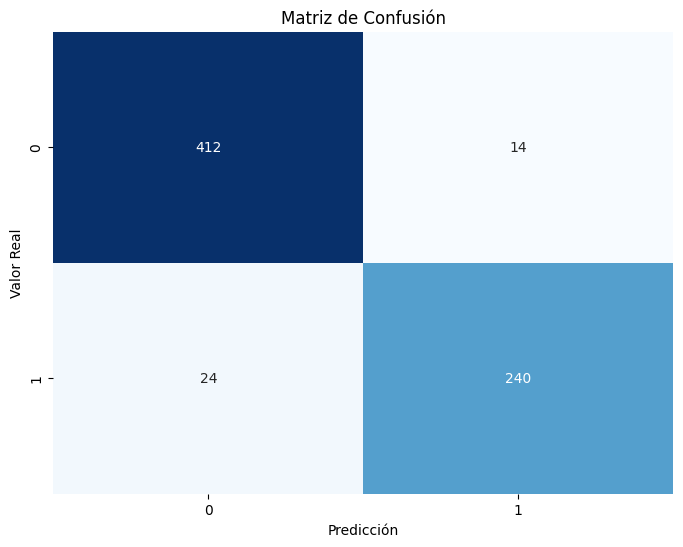

In [ ]:
# Obtener las predicciones del modelo
y_pred = rf.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20],       # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],   # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]      # Número mínimo de muestras requeridas para estar en un nodo hoja
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Hacer predicciones con el mejor modelo encontrado
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_test)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
print("The best accuracy using gridSearch is", best_accuracy)



Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
The best accuracy using gridSearch is 0.9539641943734015


In [ ]:
rf = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=0).fit(X_train, y_train)

In [ ]:
rf.score(X_test,y_test) #Obtenemos el score de rf

0.9507246376811594

In [ ]:
data = {
    'Técnica': ['SVM', 'SVM GS', 'RF', 'RF GS'],
    'Accuracy': ['65.22% %', '75.07 %', '94.49 %', '95.07 %']
}
df = pd.DataFrame(data)

print(df.to_string(index=False))

Técnica Accuracy
    SVM 65.22% %
 SVM GS  75.07 %
     RF  94.49 %
  RF GS  95.07 %


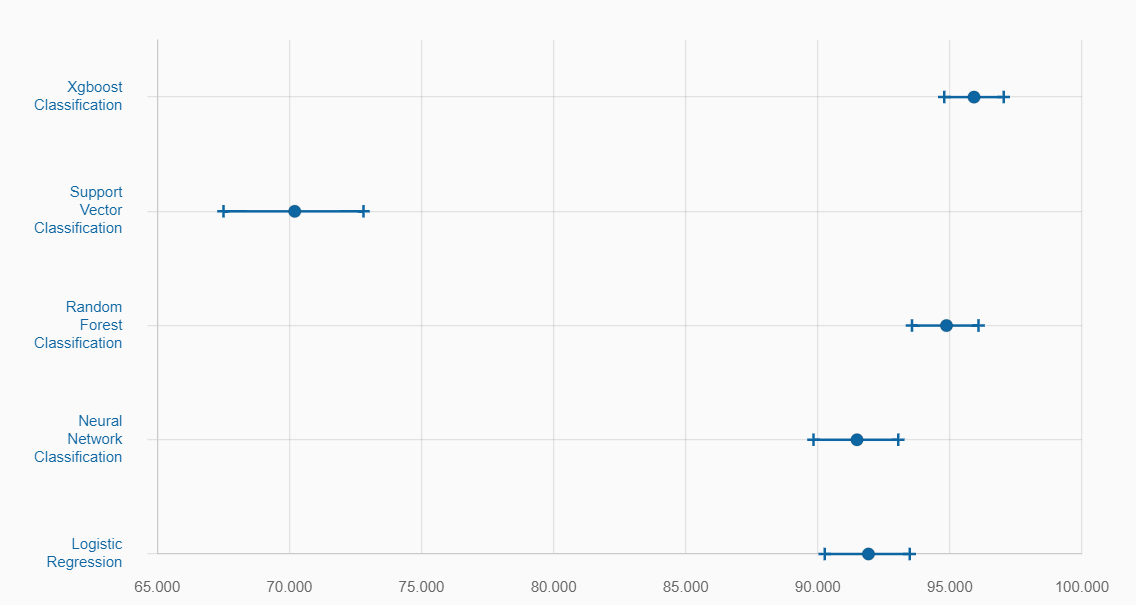



##BASE DE DATOS DE WINEQ PARA LA CLASIFICACIÓN CON SVM

Clasificar la calidad del vino, de acuerdo a diferentes caracteristicas, como ph, alcohol, sulfato, etc.

In [ ]:

#CARGANDO LA BD de wineq
df = pd.read_csv('/content/sample_data/wineq.csv', delimiter=',')
#CONVERTIMOS LA BD en un DATAFRAME
df

In [ ]:
df.info()

REALIZAMOS UN PREPROCESAMIENTO DE LOS DATOS

In [ ]:
datos_faltantes = df.isnull().sum()
print(datos_faltantes)#Podemos observar que no existen datos faltantes

In [ ]:
df=df.astype(float).fillna(0.0)#Convertimos los datos a flotantes para trabajar comodamente
df

ASIGNACION DE DATOS PARA CLASIFICAR Y LAS CARACTERISTICAS

In [ ]:
y=df.quality #Datos para clasificar
X=df[['pH', 'density','chlorides','sulphates']]
#X=df.drop('quality',axis=1)#Vamos a eliminar la columna quality porque unicamente trabajaremos con las demas para determinar las caracteristicas

ENTRANAMIENTO

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42,stratify=y)

In [ ]:
#REALIZAMOS UNA ESTANDARIZACION DE LOS DATOS
sc = StandardScaler()
X_train_array = sc.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)
print(X_train)


PRUEBA DEL MODELO SUPPORT VECTOR MACHINE

In [ ]:
svm=SVC(kernel='rbf').fit(X_train,y_train)

In [ ]:
svm.score(X_test,y_test)#OBTUVIMOS UN SCORE

In [ ]:

from sklearn.metrics import confusion_matrix


# Obtener las predicciones del modelo
y_pred = svm.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


REALIZAMOS UNA GRIDSEARCH PARA MEJORAR LOS RESULTADOS DEL SCORE

In [ ]:
from sklearn.model_selection import GridSearchCV
classifier = SVC(kernel='rbf')
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
              ]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
print("The best accuracy using gridSearch is", best_accuracy)

best_parameters = grid_search.best_params_
print("The best parameters for using this model is", best_parameters)

In [ ]:
svm=SVC(kernel='rbf', C=10)#utilizamos los mejores parametros obtenido con la grid search
svm.fit(X_train, y_train)

In [ ]:
svm.score(X_test,y_test)#Mejor el resultado con un

Los parámetros clave para el modelo de máquinas de soporte vectorial (SVM) son los siguientes:

C (Parámetro de Regularización): Este parámetro controla la fuerza de la regularización. Un valor más alto de C permite que el modelo se ajuste más a los datos de entrenamiento, pero podría llevar a un sobreajuste. Por otro lado, un valor más bajo de C favorece la simplicidad del modelo y puede resultar en un subajuste. Debe ser estrictamente positivo.
Kernel: El tipo de kernel utilizado en el algoritmo SVM afecta la forma de la superficie de decisión. Los valores posibles para el parámetro kernel son:
'linear': Kernel lineal.
'poly': Kernel polinomial.
'rbf': Kernel de base radial (RBF).
'sigmoid': Kernel sigmoide.
'precomputed': Kernel precalculado.
Grado (degree): Este parámetro solo es relevante para el kernel polinomial ('poly'). Representa el grado del polinomio utilizado en el kernel. Debe ser un número no negativo.
Gamma: El coeficiente de kernel para los kernels 'rbf', 'poly' y 'sigmoid'. Si se pasa gamma='scale' (valor predeterminado), se utiliza 1 / (n_features * X.var()) como valor de gamma. Si se especifica gamma='auto', se utiliza 1 / n_features. También puede ser un valor numérico no negativo.
Coeficiente independiente (coef0): Este término solo es significativo en los kernels 'poly' y 'sigmoid'. Afecta la función del kernel.
Encogimiento (shrinking): Determina si se utiliza la heurística de encogimiento. El encogimiento puede mejorar el rendimiento y la velocidad de ajuste.
Estimaciones de probabilidad (probability): Habilita o deshabilita las estimaciones de probabilidad. Si se habilita, puede ralentizar el ajuste debido a la validación cruzada interna.
Tolerancia (tol): Criterio de parada para el ajuste.
Tamaño de caché del kernel (cache_size): Especifica el tamaño de la caché del kernel en megabytes.

##COMPARACION DE LOS RENDIMIENTOS BASADO EN LAS METRICAS ACCURACY

BASE DE DATOS WINEQ


In [ ]:

data = {
    'Técnica': ['SVM', 'SVM GS', 'RF', 'RF GS'],
    'Accuracy': ['56.25 %', '58.75 %', '49.58 %', '63.20 %']
}
df = pd.DataFrame(data)

print(df.to_string(index=False))


## PRUEBA DEL MODELO RANDOMFOREST PARA CLASIFICACION DE WINEQ

In [ ]:
rf=RandomForestClassifier(n_estimators=10, random_state=0).fit(X_train,y_train)

In [ ]:
rf.score(X_test,y_test) #Obtenemos el score de rf

In [ ]:
# Obtener las predicciones del modelo
y_pred = rf.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

GRIDSEARCH PARA RF


In [ ]:

# Definir los hiperparámetros que deseas ajustar
param_grid = {
    'n_estimators': [50, 100, 150],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20],       # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],   # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]      # Número mínimo de muestras requeridas para estar en un nodo hoja
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Hacer predicciones con el mejor modelo encontrado
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_test)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
print("The best accuracy using gridSearch is", best_accuracy)



Probamos con los nuevos valores en los hiperparametros

In [ ]:
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=0).fit(X_train, y_train)


In [ ]:
rf.score(X_test,y_test) #Obtenemos el score de rf

In [ ]:
# Obtener las predicciones del modelo
y_pred = rf.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()